# **Project Name**    -  Name based gender classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** - Aparna Praturi


# **Project Summary -**

This project aims to predict the gender of a person based on their name.

Exploratory data analysis showed that about 1/3 of the records in the dataset have 'none' as gender. We have assumed female names to usually end with a vowel and imputed the none values accordingly.

Feature engineering and preprocessing included splitting the name and extracting the firstname, checking if the firstname starts or end with a vowel and creating character n-grams and vecorising with TFIDF.

To streamline the preprocessing step and maintain consistency, a Pipeline was created and used.

A classification model was developed and tested using logistic regression, decision tree, SVM, KNN, Naive Bayes, and Random forest algorithms. The Random Forest algorithm, after hyperparameter tuning, achieved the best performance with an precision, recall and f1 scores all to be about 0.89.

The streamlit app for this prediction system is available in the github repository.


# **GitHub Link -**

https://github.com/Aparna-Praturi/Flight-price-prediction

# **Problem Statement**


Make a prediction system which predicts the gender of an individual based on their name.

## ***1. Know The Data***

### Import Libraries

In [1]:
# Import Libraries
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 77.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [2]:


import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.base import BaseEstimator, TransformerMixin
from nltk import bigrams, trigrams

import joblib


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

### Dataset Loading

In [3]:
# Load Dataset

drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look

path ='/content/drive/MyDrive/Data science/Datasets/travel_capstone/users.csv'

df = pd.read_csv(path)

In [5]:
df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


### Dataset Rows & Columns count

In [6]:
df.shape

(1340, 5)

### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [8]:
# finding duplicates

df.duplicated().sum()



0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

In [10]:
df.isna().sum()

,0
code,0
company,0
name,0
gender,0
age,0


### What did you know about your dataset?

The data set has 1340 rows and 5 columns with no missing values and no duplicates.

## ***2. Understanding The Variables***

In [11]:
# Dataset Columns

df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [12]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

[df[i].nunique() for i in df.columns]

[1340, 5, 1338, 3, 45]

There are 3 people with the same name.

In [14]:
df['gender'].unique()

array(['male', 'female', 'none'], dtype=object)

In [15]:
df['gender'].value_counts()

,count
gender,
male,452
female,448
none,440


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Making separate columns for first and last names

df1 = df.copy()

df1['Firstname'] = [df1['name'][i].split(" ")[0] for i in range(len(df1))]
df1['Lastname'] = [df1['name'][i].split(" ")[1] for i in range(len(df1))]

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Which company has the highest number of customers in the dataset?

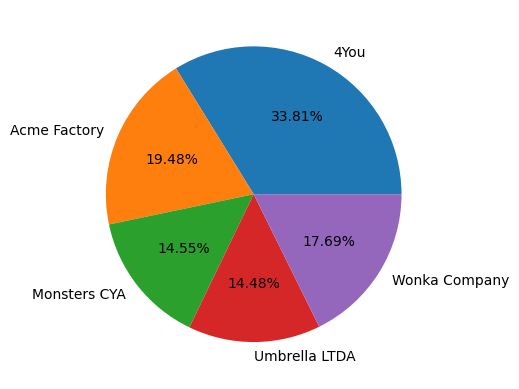

In [17]:
# Chart - 1 visualization code

y = df1.groupby('company')['code'].count()
x = y.index
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.show()

Insights:

 4you has the leading marketshare of 33.8% follwed byAcme factory at 19.4 % while Monsters CYA and UmbrellaLDTA have the least market share of about 14% each.

#### Chart - 2. what percentage of the customers are females? Is there any diaparity among customers of a particular gender chossing a particular company?

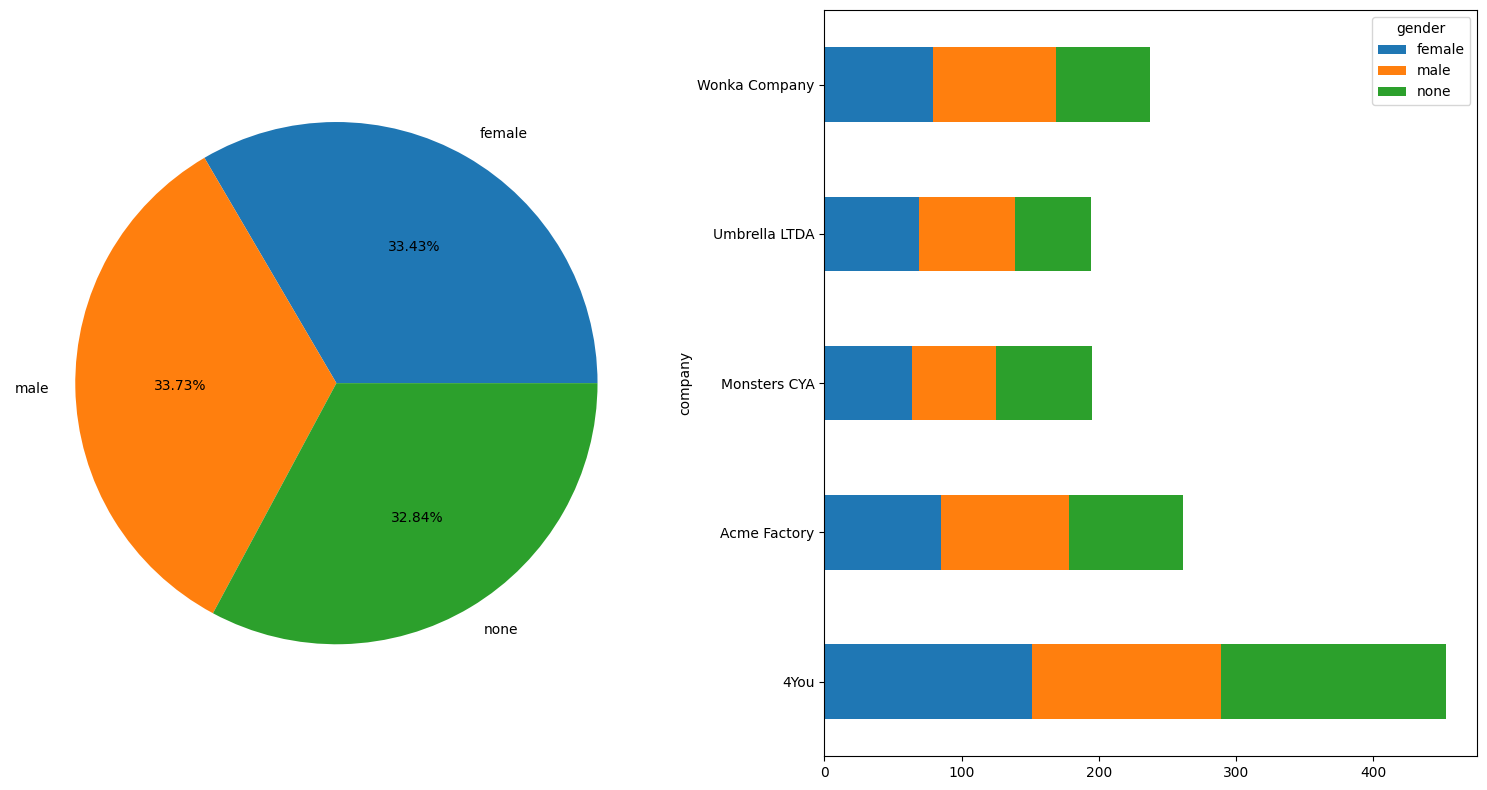

In [18]:
# Making the figure

fig, axs = plt.subplots(1, 2, figsize = (15,8))

# subplot 1

y = df1.groupby(['gender'])['code'].count()

x = y.index

axs[0].pie(y,labels=x,autopct='%1.2f%%')


# subplot 2
y = df1.groupby(['company','gender'])['code'].count().reset_index()

pivot_df =y.pivot(index = 'company',columns = 'gender',values = 'code')

pivot_df.plot(kind='barh', stacked=True, ax = axs[1])

# Show the plots

plt.tight_layout()
plt.show()



Insights:

1. Males, Females and others all constitute about 1/3 rd each of the customers.

2. Umbrella LDTA and Wonka company have lesser share of customers identifying as 'None' whereas Monsters CYA has a slighlty less male customer base.

#### Chart - 3: What is the age distribution of male, female and other customers?

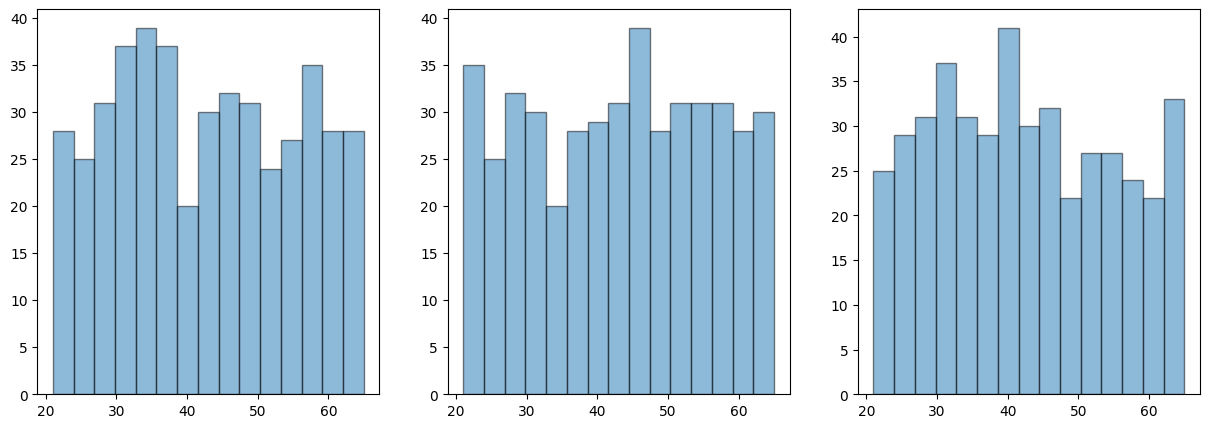

In [19]:
# Chart - 3 visualization code

fig,axs = plt.subplots(1,3,figsize=(15,5))

df_m = df1[df1['gender']=='male']
df_f = df1[df1['gender']=='female']
df_o = df1[df1['gender']=='none']

axs[0].hist(df_m['age'], bins=15, alpha=0.5, edgecolor='black', label='Male')
axs[1].hist(df_f['age'], bins=15, alpha=0.5,edgecolor='black', label='Female')
axs[2].hist(df_o['age'], bins=15, alpha=0.5, edgecolor='black',label='Other')
plt.show()

Insights:

All the genders have a uniform distribution of age starting from about 21 to about 65.

#### Chart - 4 What are the most common first names and last names?

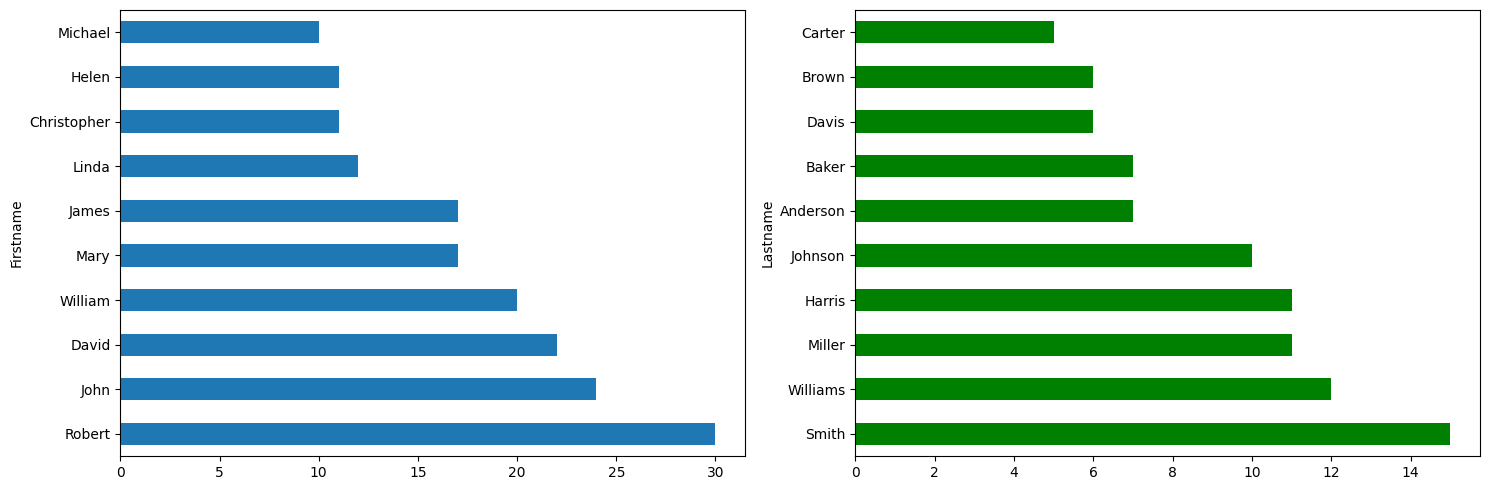

In [20]:
# Chart - 4 visualization code

fig,axs = plt.subplots(1,2,figsize=(15,5))


df1['Firstname'].value_counts().head(10).plot(kind='barh',ax=axs[0] )
df1['Lastname'].value_counts().head(10).plot(kind='barh',ax=axs[1], color ='green')

plt.tight_layout()
plt.show()

Insights:

1. The top 5 most common first names are robert, John, David, William and Mary.

2. The top 5 most common last names are smith, Williams, miller, Harris and Johnson.

## ***5. Feature Engineering***

### 1. Handling Missing Values


There are no missing value in the dataset.

### 2. Handling Outliers

There are no outliers in the dataset.

### 3. Feature Manipulation & Selection

Split name into Firstname and Last name

In [21]:
class Namesplitter(BaseEstimator, TransformerMixin):

    def __init__(self, name_col):
        self.name_col = name_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = pd.DataFrame(X)
        X_copy['Firstname'] = X_copy[self.name_col].apply(lambda x: x.split(" ")[0])

        X_copy.drop(columns = [self.name_col], inplace = True)

        return X_copy[['Firstname']]

Check if firstname starts or ends with a vowel

In [22]:
class IsVowelEnd(BaseEstimator, TransformerMixin):

    def __init__(self, col_name):
        self.col_name= col_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        vowels = 'aeiouAEIOU'
        X['is_vowel_end'] = X[self.col_name].apply(lambda x: 1 if isinstance(x, str) and x[-1] in vowels else 0)
        X['is_vowel_start'] = X[self.col_name].apply(lambda x: 1 if isinstance(x, str) and x[0] in vowels else 0)
        return X

Use tfidf for firstname n-grams and convert to dense vector

In [23]:
class TfidfAndDense(BaseEstimator, TransformerMixin):
    def __init__(self, col_name, ngram_range=(2, 3)):

        self.ngram_range = ngram_range
        self.tfidf_vectorizer = CountVectorizer(analyzer='char', ngram_range=self.ngram_range)
        self.col_name = col_name

    def fit(self, X, y=None):

        z = X[self.col_name].tolist()
        self.tfidf_vectorizer.fit(z)
        return self

    def transform(self, X):

        tfidf_matrix = self.tfidf_vectorizer.transform(X[self.col_name])
        X_dense = tfidf_matrix.toarray()
        X_dense_df = pd.DataFrame(X_dense, columns=self.tfidf_vectorizer.get_feature_names_out(), index=X.index  )

        X = pd.concat([X, X_dense_df], axis=1)
        X = X.drop(columns = [self.col_name])
        return X

## 6. Model selection

Train the classification model

In [24]:
class Model_training:

  """ This class performs model training using given models,calculates accuracy scores using given scoring method,
      plots the residuals,hyperparameter tuning for best model using given hyperparameters and returns the best model
      along with evaluation metrics. """

  def __init__(self, models=None, cv=5, tune_best_model=True, param_grids={}):
    self.models = models
    self.cv = cv
    self.tune_best_model = tune_best_model
    self.param_grids = param_grids if param_grids else {}
    self. evaluation_metrics = pd.DataFrame(index =['train_accuracy', 'test_accuracy', 'train_precision',
                                                    'test_precision','train_recall', 'test_recall', 'train_f1', 'test_f1'])
  # function for calculating eval parameters
  def eval_cal(self, y, y_pred):
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')

    print(f"Accuracy Score: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")

    return accuracy, f1, precision, recall

  # function for plotting confusion matrix
  def plot(self, y, y_pred):
    cm = confusion_matrix(y, y_pred)
    print(cm)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

  ## Find best model
  def find_model(self, X_train, y_train, X_test, y_test):   ## 1. Define function to find best model

    bestModel_score = -float('inf')
    bestModel = None
    bestModel_name = None

    # loop through all models
    for name, model in self.models:

     print(f"Training {name} model...")

     # fit the model
     model.fit(X_train, y_train)

     # Predict train and test
     y_pred_train = model.predict(X_train)
     y_pred_test = model.predict(X_test)

     # calculate evaluation metrics
     train_accuracy, train_f1, train_precision, train_recall = self.eval_cal(y_train, y_pred_train)
     test_accuracy, test_f1, test_precision, test_recall = self.eval_cal(y_test, y_pred_test)

     # update metrics table
     self.evaluation_metrics[name] = [train_accuracy, test_accuracy, train_precision,
                                      test_precision,train_recall, test_recall, train_f1, test_f1]

     # plot confusion_matrix
     self.plot(y_test, y_pred_test)

    # update the best model

     if test_f1 > bestModel_score:

      bestModel = model
      bestModel_score = test_f1
      bestModel_name = name

    if (bestModel_name in self.param_grids) and self.tune_best_model:

      name = bestModel_name
      model= bestModel
      print(f'Tuning hyperparameters for {name}, {model}')
      param_grid = self.param_grids[name]

      # search the grid
      grid_search = RandomizedSearchCV(model, param_grid, cv=self.cv)
      grid_search.fit(X_train, y_train)

      # find the best parameters
      best_params = grid_search.best_estimator_
      best_params.fit(X_train, y_train)

      # predict using the best tuned model
      y_pred_train_bestparam = best_params.predict(X_train)
      y_pred_test_bestparam = best_params.predict(X_test)

      # calculate evaluation metrics
      train_accuracy_bp, train_f1_bp, train_precision_bp, train_recall_bp = self.eval_cal(y_train, y_pred_train_bestparam)
      test_accuracy_bp, test_f1_bp, test_precision_bp, test_recall_bp = self.eval_cal(y_test, y_pred_test_bestparam)

      # plot confusion_matrix
      self.plot(y_test, y_pred_test_bestparam)

      # update metrics table
      self.evaluation_metrics[f'{name}-hyperparameter_tuned '] = [train_accuracy_bp, test_accuracy_bp, train_precision_bp,
                                      test_precision_bp,train_recall_bp, test_recall_bp, train_f1_bp, test_f1_bp]

      print(f"Best Hyperparameters for {bestModel_name}: {best_params} with training eroor of {train_accuracy_bp} and testing error of{ test_accuracy_bp}")

      self.plot(y_test, y_pred_test_bestparam)
      return best_params, bestModel_name,  self.evaluation_metrics

    else:

      print(f"No tuning required for {bestModel_name}")

      return bestModel, bestModel_name, self.evaluation_metrics

Define models and tuning parameters

In [25]:
## Define models and tuning parameters
models = [('Logistic Regression', LogisticRegression(class_weight='balanced')),
          ('Multinomial Naive Bayes', MultinomialNB(alpha = 5)),
          ('SVC', SVC( C= 1)),
          ('KNN', KNeighborsClassifier(n_neighbors=3)),
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('XGB', xgb.XGBClassifier( objective='binary:logistic'))
          ]

param_grids = {

  'Multinomial Naive Bayes' : {'alpha': [0.1, 0.5, 1, 2, 5]},

  'Logistic Regression' :{'C': [0.01, 0.1, 1, 10, 100],
                           'penalty': ['l1', 'l2'],
                           'solver': ['liblinear', 'saga'],
                           'max_iter': [50, 100, 200],},

   'SVC': { 'C': [ 0.1, 1, 10, 100],
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto', 0.1, 1]},

    'Random Forest' : {'n_estimators': [50, 100, 200, 500],
                      'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [ 10, 15, 20],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': ['sqrt', 'log2', 0.6],
                      'class_weight': ['balanced', None],
                      'random_state': [42]},


    'XGB' :  {'n_estimators': [ 200, 500, 800],
                  'learning_rate': [0.01, 0.05, 0.1],
                  'max_depth': [3, 5, 7],
                  'min_child_weight': [1, 5, 10],
                  'subsample': [0.8, 0.9, 1.0],
                  'num_class': [2],
                  'eval_metric': ['merror'],
                  'random_state': [42]},

    'KNN' : {'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'cosine'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

}




## ***7. Pre-processing***

For the given data:

In [26]:
# Removing irrelavant columns

df_mod = df.copy()

df_mod = df_mod.drop(columns = ['code', 'company', 'age'])

We see that almost 1/3 data has gender given as none.
We cannot remove these rows as they are a huge chunk of data.
therefore, we have to impute them.
For, this, we assume that names ending with a vowel are female and names ending with a consinant are male and impute accordingly.

In [27]:
# replacing 'none' values in gender with male/female based on whether the firstname ends with vowel or consonant

vowels = 'aeiouAEIOU'

df_mod['gender'] = df_mod.apply(lambda row: row['gender'].replace('none', 'female')
                   if row['name'].split(' ')[0][-1] in vowels else row['gender'].replace('none', 'male')
                   if row['gender'] == 'none' else row['gender'], axis=1 )


In [28]:
# Define preprocessing pipeline
preprocessor = Pipeline([
    ('namesplitter', Namesplitter('name')),
    ('is_vowel_end', IsVowelEnd('Firstname')),
    ('vectorizer', TfidfAndDense(col_name='Firstname'))
])

In [29]:
# splitting into train and test data

X = df_mod.drop(columns = ['gender'])
y = df_mod['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [30]:
# preprocess the data using the pipeline
preprocessor.fit(X_train)
X_train_transformed = preprocessor .transform(X_train)
X_test_transformed = preprocessor .transform(X_test)
print(f'train_shape:{X_train_transformed.shape}')
print(f'test_shape:{X_test_transformed.shape}')

# save the pipeline
with open('preprocessor.joblib', 'wb') as file:
    joblib.dump(preprocessor , file)
print(X_train_transformed.head())

train_shape:(1005, 1145)
test_shape:(335, 1145)
      is_vowel_end  is_vowel_start  aa  aar  ab  abb  abe  abr  ac  ace  ...  \
366              1               0   0    0   0    0    0    0   0    0  ...   
983              0               0   0    0   0    0    0    0   0    0  ...   
593              0               0   0    0   0    0    0    0   0    0  ...   
39               1               0   0    0   0    0    0    0   0    0  ...   
1041             1               0   0    0   0    0    0    0   0    0  ...   

      yvo  za  zab  zac  zan  zar  zi  zie  zo  zoe  
366     0   0    0    0    0    0   0    0   0    0  
983     0   0    0    0    0    0   0    0   0    0  
593     0   0    0    0    0    0   0    0   0    0  
39      0   0    0    0    0    0   0    0   0    0  
1041    0   0    0    0    0    0   0    0   0    0  

[5 rows x 1145 columns]


Encode the y

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform on y_train, transform on y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


## 8. ***Model training***

Train the model

In [32]:
model_training = Model_training(models=models, cv=5, tune_best_model=True, param_grids=param_grids)

Training Logistic Regression model...
Accuracy Score: 0.9213930348258706
F1 Score: 0.9215632757005016
Precision Score: 0.9237214342190425
Recall Score: 0.9213930348258706
Accuracy Score: 0.8895522388059701
F1 Score: 0.8897659148480119
Precision Score: 0.8912649253731344
Recall Score: 0.8895522388059701
[[137  14]
 [ 23 161]]


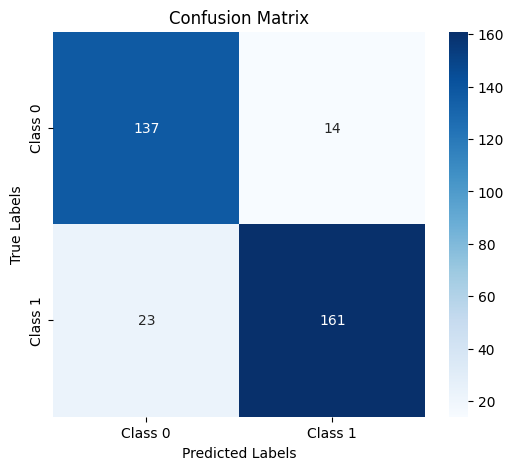

Training Multinomial Naive Bayes model...
Accuracy Score: 0.8477611940298507
F1 Score: 0.8481174759368736
Precision Score: 0.8543185047758167
Recall Score: 0.8477611940298507
Accuracy Score: 0.826865671641791
F1 Score: 0.8272863811303688
Precision Score: 0.8314773438198231
Recall Score: 0.826865671641791
[[130  21]
 [ 37 147]]


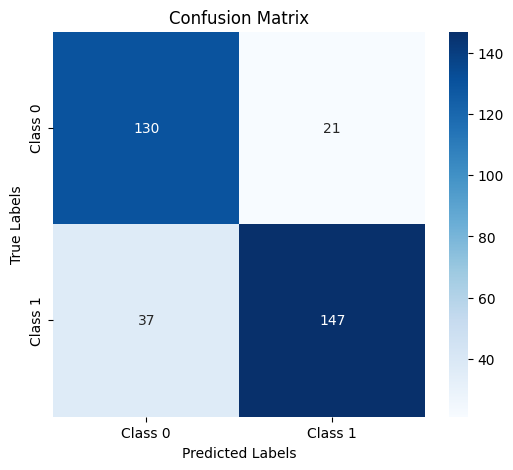

Training SVC model...
Accuracy Score: 0.9104477611940298
F1 Score: 0.9103282031065714
Precision Score: 0.9104715242718237
Recall Score: 0.9104477611940298
Accuracy Score: 0.8955223880597015
F1 Score: 0.8953431989725055
Precision Score: 0.8955683638775032
Recall Score: 0.8955223880597015
[[131  20]
 [ 15 169]]


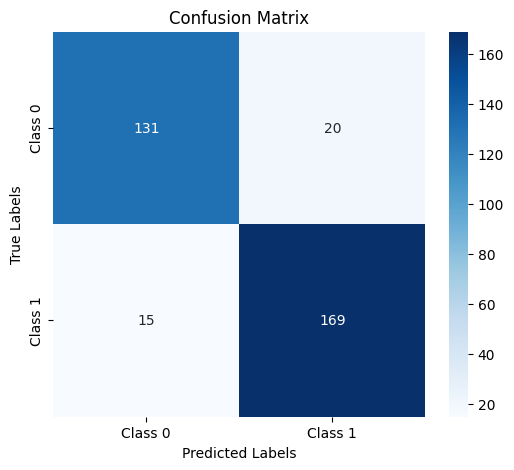

Training KNN model...
Accuracy Score: 0.8676616915422886
F1 Score: 0.8679693862456106
Precision Score: 0.8708895261249024
Recall Score: 0.8676616915422886
Accuracy Score: 0.8029850746268656
F1 Score: 0.8032309043020194
Precision Score: 0.8147513399910632
Recall Score: 0.8029850746268656
[[132  19]
 [ 47 137]]


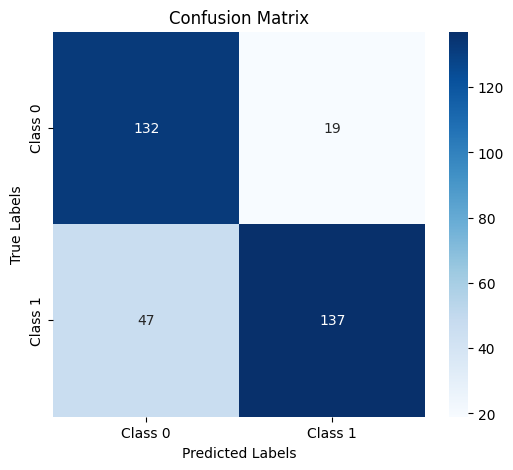

Training Random Forest model...
Accuracy Score: 0.945273631840796
F1 Score: 0.9453744171495211
Precision Score: 0.9466472390613366
Recall Score: 0.945273631840796
Accuracy Score: 0.9014925373134328
F1 Score: 0.9016532591326241
Precision Score: 0.9026028407629308
Recall Score: 0.9014925373134328
[[138  13]
 [ 20 164]]


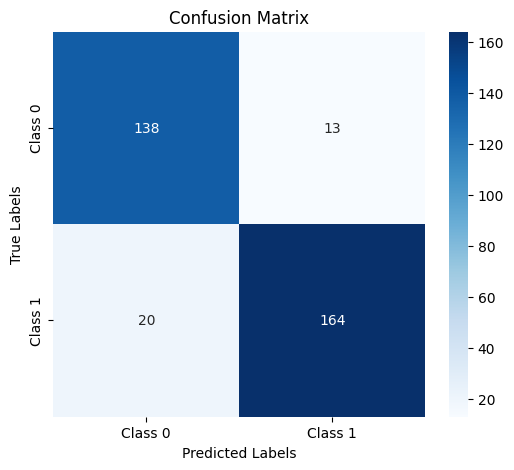

Training XGB model...
Accuracy Score: 0.9114427860696518
F1 Score: 0.9114997280290242
Precision Score: 0.9116456012716634
Recall Score: 0.9114427860696518
Accuracy Score: 0.8895522388059701
F1 Score: 0.8895840220485508
Precision Score: 0.889631759236604
Recall Score: 0.8895522388059701
[[133  18]
 [ 19 165]]


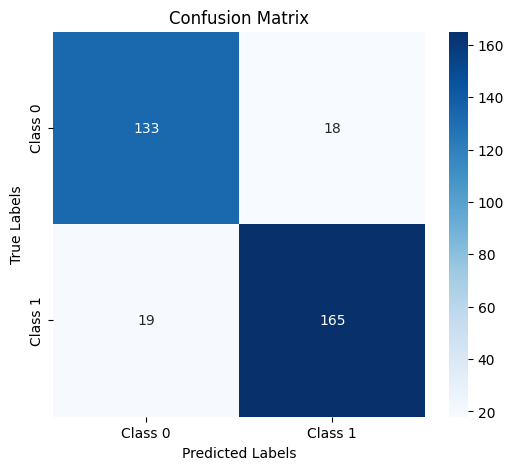

Tuning hyperparameters for Random Forest, RandomForestClassifier(random_state=42)
Accuracy Score: 0.9263681592039801
F1 Score: 0.9265451096058932
Precision Score: 0.9302727636236979
Recall Score: 0.9263681592039801
Accuracy Score: 0.9014925373134328
F1 Score: 0.9017318359572606
Precision Score: 0.9066131064097818
Recall Score: 0.9014925373134328
[[143   8]
 [ 25 159]]


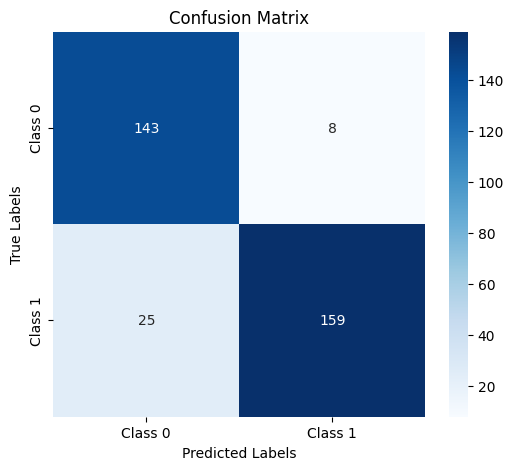

Best Hyperparameters for Random Forest: RandomForestClassifier(class_weight='balanced', max_features=0.6,
                       min_samples_split=20, n_estimators=50, random_state=42) with training eroor of 0.9263681592039801 and testing error of0.9014925373134328
[[143   8]
 [ 25 159]]


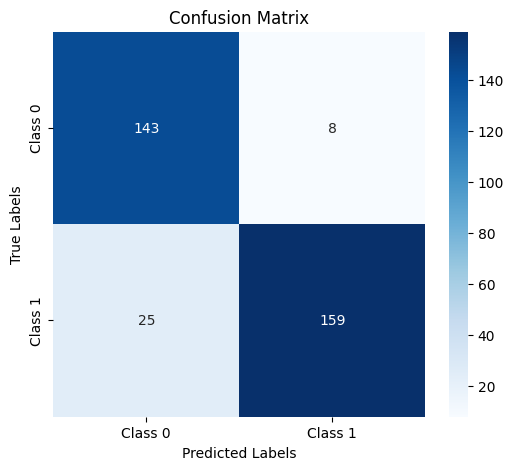

In [33]:
model, model_name, evaluation_metrics = model_training.find_model(X_train_transformed, y_train_encoded, X_test_transformed, y_test_encoded)

Evaluation metrics

In [34]:
evaluation_metrics.transpose()

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
Logistic Regression,0.921393,0.889552,0.923721,0.891265,0.921393,0.889552,0.921563,0.889766
Multinomial Naive Bayes,0.847761,0.826866,0.854319,0.831477,0.847761,0.826866,0.848117,0.827286
SVC,0.910448,0.895522,0.910472,0.895568,0.910448,0.895522,0.910328,0.895343
KNN,0.867662,0.802985,0.870890,0.814751,0.867662,0.802985,0.867969,0.803231
Random Forest,0.945274,0.901493,0.946647,0.902603,0.945274,0.901493,0.945374,0.901653
XGB,0.911443,0.889552,0.911646,0.889632,0.911443,0.889552,0.911500,0.889584
Random Forest-hyperparameter_tuned,0.926368,0.901493,0.930273,0.906613,0.926368,0.901493,0.926545,0.901732


##  ***8. Save the model and sanity check***

Save the model

In [35]:
with open('best_classifier.joblib', 'wb') as file:
    joblib.dump(model, file)

Function for predicting using the chosen model and reverse encoding the result

In [36]:
def test_predict(processor_path, model_path, test_data):

    # load preprocessor and model
    with open(processor_path, 'rb') as file:
        processor = joblib.load(file)

    with open(model_path, 'rb') as file:
        model = joblib.load(file)

    # preprocess the data
    x_ver = processor.transform(test_data)

    # predict gender
    a = model.predict(x_ver)

    # make a dictionary
    diction = dict(zip(test_data['name'], a));

    # map values
    class_map = {0: "Female", 1: "Male"}

    return [{key: class_map[value]} for key, value in diction.items()]

Testing with new names

In [37]:
# Test data
df_test = pd.DataFrame({'name':[ 'Harry','Hermione', 'Minerva','Severus','Helga', 'Nick', 'Manas', 'Aparna', 'Maria', 'Lalitha','Annapurna', 'Emmie', 'Salazar', 'Veronica', 'Susan']})

# Declaring paths for model and processor
processor_path = 'preprocessor.joblib'
model_path = 'best_classifier.joblib'
test_data = df_test

# Predict gender for test data
test_predict(processor_path, model_path, test_data)

[{'Harry': 'Male'},
 {'Hermione': 'Female'},
 {'Minerva': 'Female'},
 {'Severus': 'Male'},
 {'Helga': 'Female'},
 {'Nick': 'Male'},
 {'Manas': 'Male'},
 {'Aparna': 'Female'},
 {'Maria': 'Female'},
 {'Lalitha': 'Female'},
 {'Annapurna': 'Female'},
 {'Emmie': 'Female'},
 {'Salazar': 'Male'},
 {'Veronica': 'Female'},
 {'Susan': 'Female'}]

# **Conclusion**

A gender predictor based on name has been succesfully built based on Random Forest classifier with an accuracy of about 90%. The important steps used in the process are:

1. Separtion of firstname and lastname.
2. checking whether firstname starts or ends with a vowel.
3. creating character n-grams and vectorising using TF-IDF.

After the above preprocessing, steps, various classifiers have been tested and RandomForest was chosen and hyper-parameter tuned.

The resulting classifier predicts gender based on name with an accuracy and f1 score of about 0.89.